In [1]:
%load_ext autoreload
%matplotlib inline

In [2]:
import os
import glob
import sys
import yaml

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tempest import casestudy
from tempest import grid
from tempest import joint_distrib
from tempest import handler

settings_path = 'settings/tropics.yaml'

In [3]:
# Instantiate CaseStudy by passing the settings. 
# Should also create appropriate directories
hdlr = handler.Handler(settings_path)
cs = casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False)
gr = grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False)
# jd = joint_distrib.JointDistribution(gr)

if __name__ == '__main__':
    # print("Loaded Configuration:")
    # for key, value in settings.items():
    #     print(f"{key}: {value}")
    
    #gr.compute_funcs_for_var_id()
    pass

Data loaded from /homedata/mcarenso/tempest/DYAMOND_SAM_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /homedata/mcarenso/tempest/DYAMOND_SAM_Tropics/grid_attributes.pkl instead of computing


In [4]:
jd = joint_distrib.JointDistribution(gr, nd=5, storm_tracking=True)

Distribs loaded
Overwrite set to false so loading basics attributes from .npy
/data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/FileTracking/TOOCAN-GLOBAL-20160901-20160910.dat.gz
/data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/FileTracking/TOOCAN-GLOBAL-20160801-20160831.dat.gz


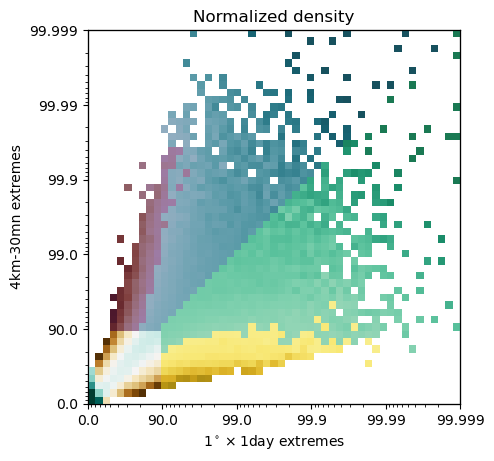

In [5]:
%matplotlib inline
jd.plot(branch=False)

Convective only
figure size = 15 3.25
Mostly convective
figure size = 15 3.25
Mostly mesoscale
figure size = 15 3.25
Mesoscale only
figure size = 15 3.25


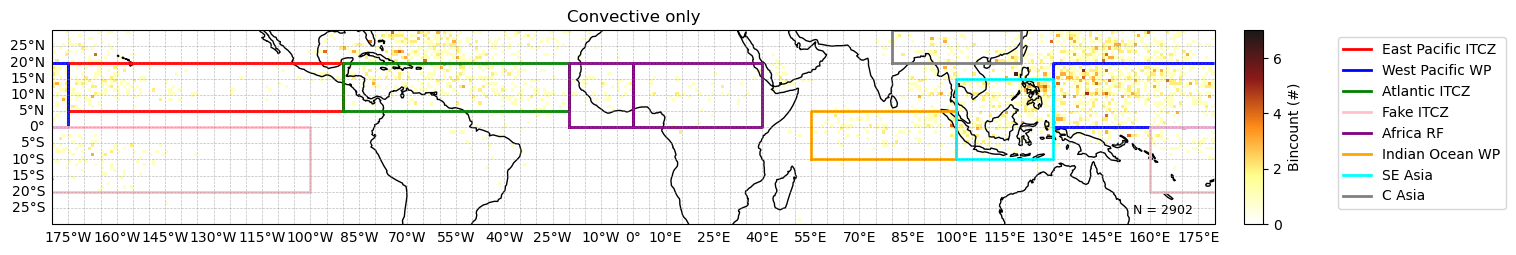

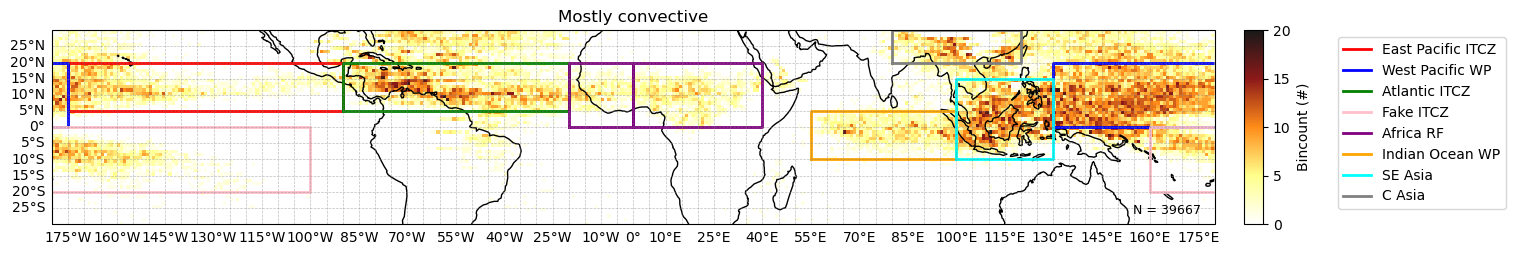

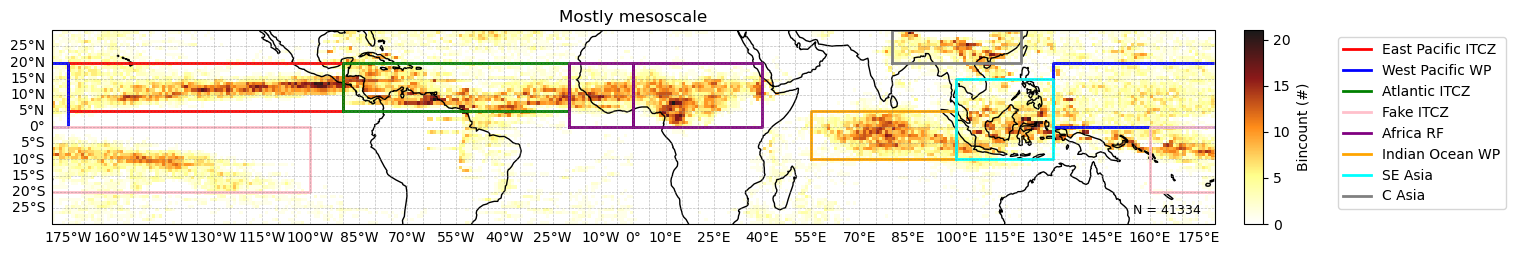

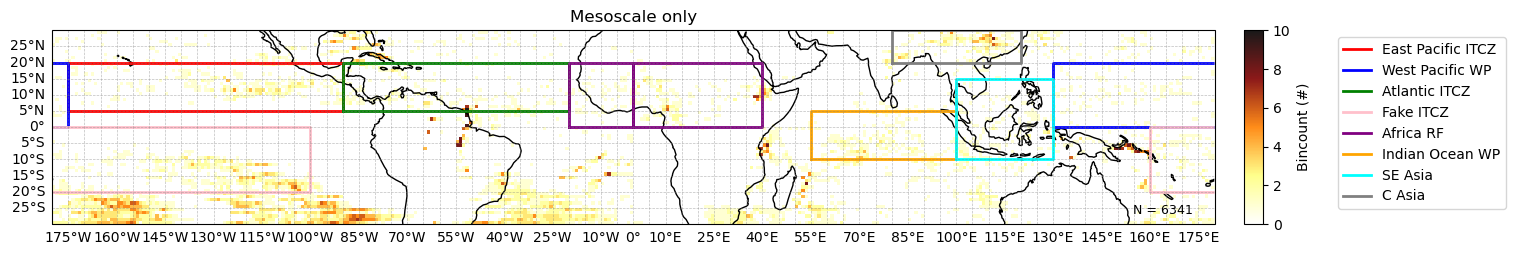

In [6]:
import cartopy.crs as ccrs
%matplotlib inline
# Show frequency maps of extremes in the 4 regions (normalized by total bincount in mask?)
jd.make_mask()

mask_all = jd.mask_branch1_90, jd.mask_coloc_c_90, jd.mask_coloc_ac_90, jd.mask_branch2_90
mask_names = 'Convective only','Mostly convective','Mostly mesoscale','Mesoscale only'
mask_labels = 'conv','mostlyconv','mostlyacc','acc'

for mask,mask_name,mask_label in zip(mask_all,mask_names,mask_labels):
    
    print(mask_name)
    mask_yxt = jd.get_mask_yxt_from_mask_jdist(mask)
    ax = jd.make_map(mask_yxt)
    
    #EP ITCZ
    lon_min, lon_max = 185, 270 #gr.lon_slice.start , gr.lon_slice.stop
    lat_min, lat_max = 5, 20#gr.lat_slice.start, gr.lat_slice.stop
    ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
                [lat_min, lat_min, lat_max, lat_max, lat_min],
                color='red', linestyle='-', linewidth=2, transform=ccrs.PlateCarree(), label = "East Pacific ITCZ")
    
    # WPWP
    lon_min, lon_max = 130, 185 #gr.lon_slice.start , gr.lon_slice.stop
    lat_min, lat_max = 0, 20 #gr.lat_slice.start, gr.lat_slice.stop
    ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
                [lat_min, lat_min, lat_max, lat_max, lat_min],
                color='blue', linestyle='-', linewidth=2, transform=ccrs.PlateCarree(), label = "West Pacific WP")
    
    # Atlantic ITCZ
    lon_min, lon_max = 270, 340 #gr.lon_slice.start , gr.lon_slice.stop
    lat_min, lat_max = 5, 20 #gr.lat_slice.start, gr.lat_slice.stop
    ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
                [lat_min, lat_min, lat_max, lat_max, lat_min],
                color='green', linestyle='-', linewidth=2, transform=ccrs.PlateCarree(), label = "Atlantic ITCZ")
    
    # Fake ITCZ
    lon_min, lon_max = 160, 260 #gr.lon_slice.start , gr.lon_slice.stop
    lat_min, lat_max = -20, 0 #gr.lat_slice.start, gr.lat_slice.stop
    ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
                [lat_min, lat_min, lat_max, lat_max, lat_min],
                color='pink', linestyle='-', linewidth=2, transform=ccrs.PlateCarree(), label = "Fake ITCZ")
    
    # Africa Rain Forest
    lon_min, lon_max = 340, 360 #gr.lon_slice.start , gr.lon_slice.stop
    lat_min, lat_max = 0, 20 #gr.lat_slice.start, gr.lat_slice.stop
    ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
                [lat_min, lat_min, lat_max, lat_max, lat_min],
                color='purple', linestyle='-', linewidth=2, transform=ccrs.PlateCarree(), label = "Africa RF")
    
    # Twice is best Africa Rain Forest
    lon_min, lon_max = 0, 40 #gr.lon_slice.start , gr.lon_slice.stop
    lat_min, lat_max = 0, 20 #gr.lat_slice.start, gr.lat_slice.stop
    ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
                [lat_min, lat_min, lat_max, lat_max, lat_min],
                color='purple', linestyle='-', linewidth=2, transform=ccrs.PlateCarree())
    
    # Indian Ocean Warmm Pool
    lon_min, lon_max = 55, 100 #gr.lon_slice.start , gr.lon_slice.stop
    lat_min, lat_max = -10, 5 #gr.lat_slice.start, gr.lat_slice.stop
    ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
                [lat_min, lat_min, lat_max, lat_max, lat_min],
                color='orange', linestyle='-', linewidth=2, transform=ccrs.PlateCarree(), label = "Indian Ocean WP")
    

    # South East Asia
    lon_min, lon_max = 100, 130 #gr.lon_slice.start , gr.lon_slice.stop
    lat_min, lat_max = -10, 15 #gr.lat_slice.start, gr.lat_slice.stop
    ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
                [lat_min, lat_min, lat_max, lat_max, lat_min],
                color='cyan', linestyle='-', linewidth=2, transform=ccrs.PlateCarree(), label = "SE Asia")
    
    # Central Asial
    lon_min, lon_max = 80, 120 #gr.lon_slice.start , gr.lon_slice.stop
    lat_min, lat_max = 20, 30 #gr.lat_slice.start, gr.lat_slice.stop
    ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
                [lat_min, lat_min, lat_max, lat_max, lat_min],
                color='gray', linestyle='-', linewidth=2, transform=ccrs.PlateCarree(), label = "C Asia")
    
    ax.legend(bbox_to_anchor = (1.1, 1))
    
    ax.set_title(mask_name)

    # plt.savefig(os.path.join(figdir,'map_bincount_%s_extremes.pdf'%(mask_label)),bbox_inches='tight')
    # plt.savefig(os.path.join(figdir,'map_bincount_%s_extremes.png'%(mask_label)),bbox_inches='tight')

# Pre computation
### mcs bin (TODO to be regionalized ?)

<AxesSubplot:xlabel='1$^\\circ\\times 1$day extremes', ylabel='4km-30mn extremes'>

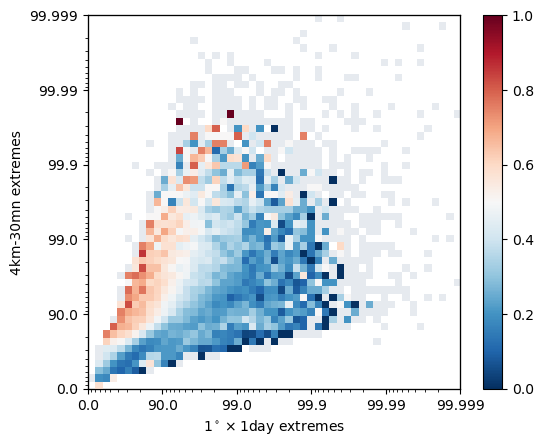

In [7]:
data, noise = jd.get_mcs_bin_fraction()
jd.plot_data(data, noise, branch=False)

### Growth rate

In [8]:
from tempest.storm_analysis import set_storm_growth_rate
compute = False
if compute:
    storms_growth_rates = []
    outputs = [] # r_squared, growth_r_squared, decay_r_squared, t_breaks, s_max
    for storm in jd.storms:
        output = set_storm_growth_rate(storm) # total, growth, decay
        storms_growth_rates.append(storm.growth_rate)
        outputs.append(output)
    ## save the babies pls
    storms_growth_rates = np.array(storms_growth_rates)
    file = os.path.join(jd.jd_path, 'storms_growth_rates.npy')
    np.save(file, storms_growth_rates)
    
    # outputs contains r_scores and all computation stuff 
    
    # outputs= np.array(outputs)
    # file = os.path.join(jd.jd_path, 'outputs_growth_rate.npy')

else : 
    file = os.path.join(jd.jd_path, 'storms_growth_rates.npy')
    storms_growth_rates = np.load(file)
    for storm, growth_rate in zip(jd.storms, storms_growth_rates):
        setattr(storm, 'growth_rate', growth_rate)
        
    # file = os.path.join(jd.jd_path, "outputs_growth_rate")
    # outputs = np.load(file)

In [9]:
growth_rates = [jd.storm_attributes_on_jdist('growth_rate', 'mean', region_labels_in_jdist = labels) for labels in jd.regions_labels_in_jdist]

123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495012345678910111213141516171819202122232425262728293031323334353637383940414243444546474849501234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950123456789101112131415

/home/mcarenso/code/tempest/tempest/joint_distrib.py:822: RuntimeWarning: Mean of empty slice
  out_ij[i_bin,j_bin] = getattr(np,'nan%s'%func)(attr_list)


161718192021222324252627282930313233343536373839404142434445464748495012345678910111213141516171819202122232425262728293031323334353637383940414243444546474849501234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950

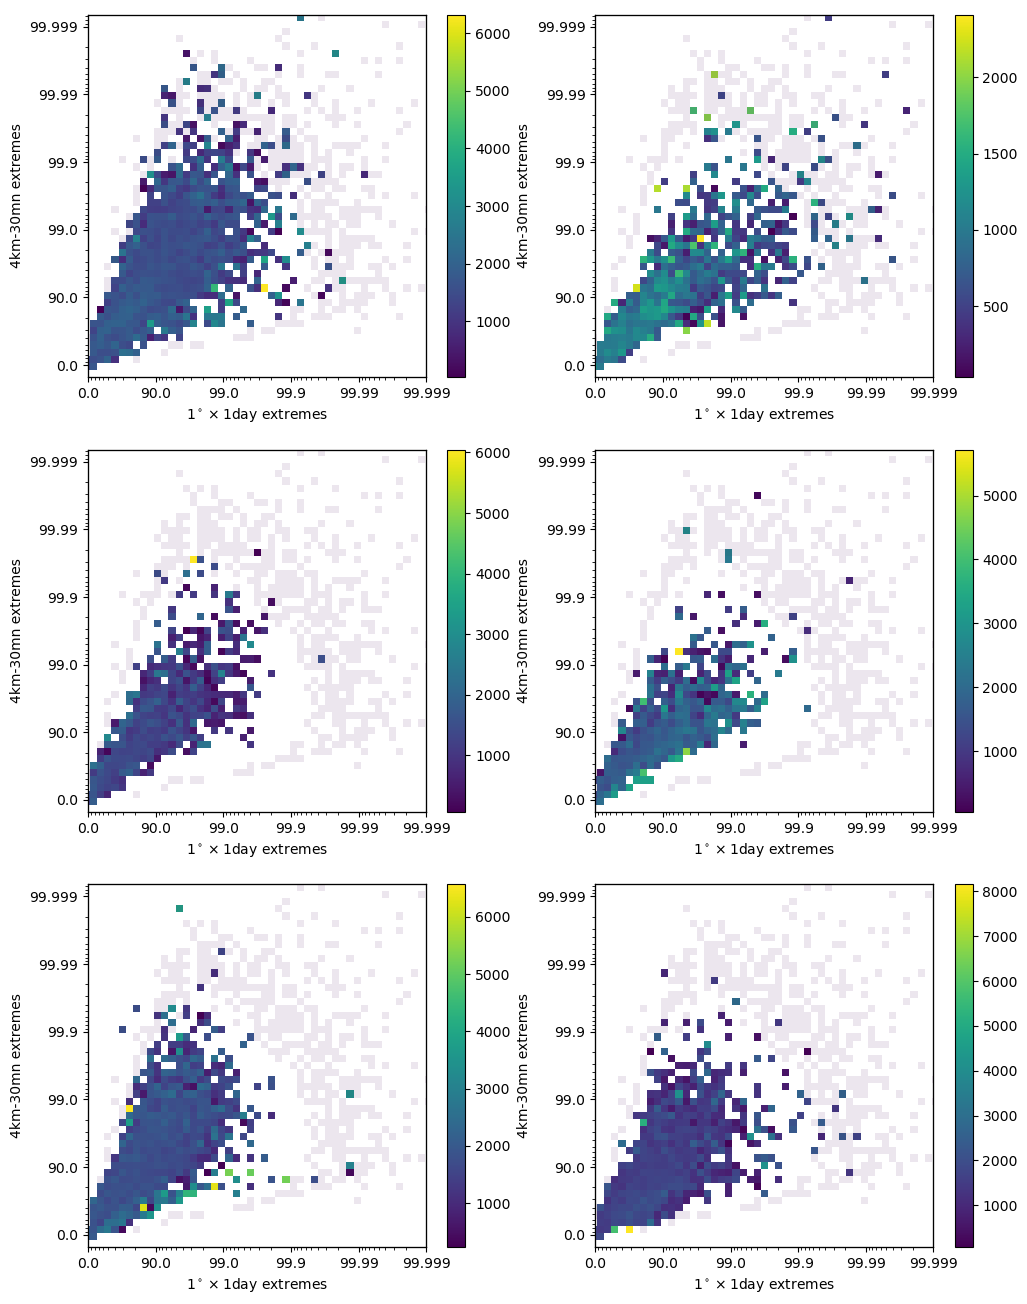

In [17]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize = (12, 16))

for growth_rate, ax in zip(growth_rates, axs.flatten()):
    jd.plot_data(growth_rate, noise, cmap = plt.cm.viridis, fig = fig, ax = ax)

## Surf max

In [18]:
surfaces = [jd.storm_attributes_on_jdist('surfmaxkm2_172Wm2', 'mean', region_labels_in_jdist = labels) for labels in jd.regions_labels_in_jdist]

123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495012345678910111213141516171819202122232425262728293031323334353637383940414243444546474849501234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495012345678910111213141516171819202122232425262728293031323334353637383940414243444546474849501234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950

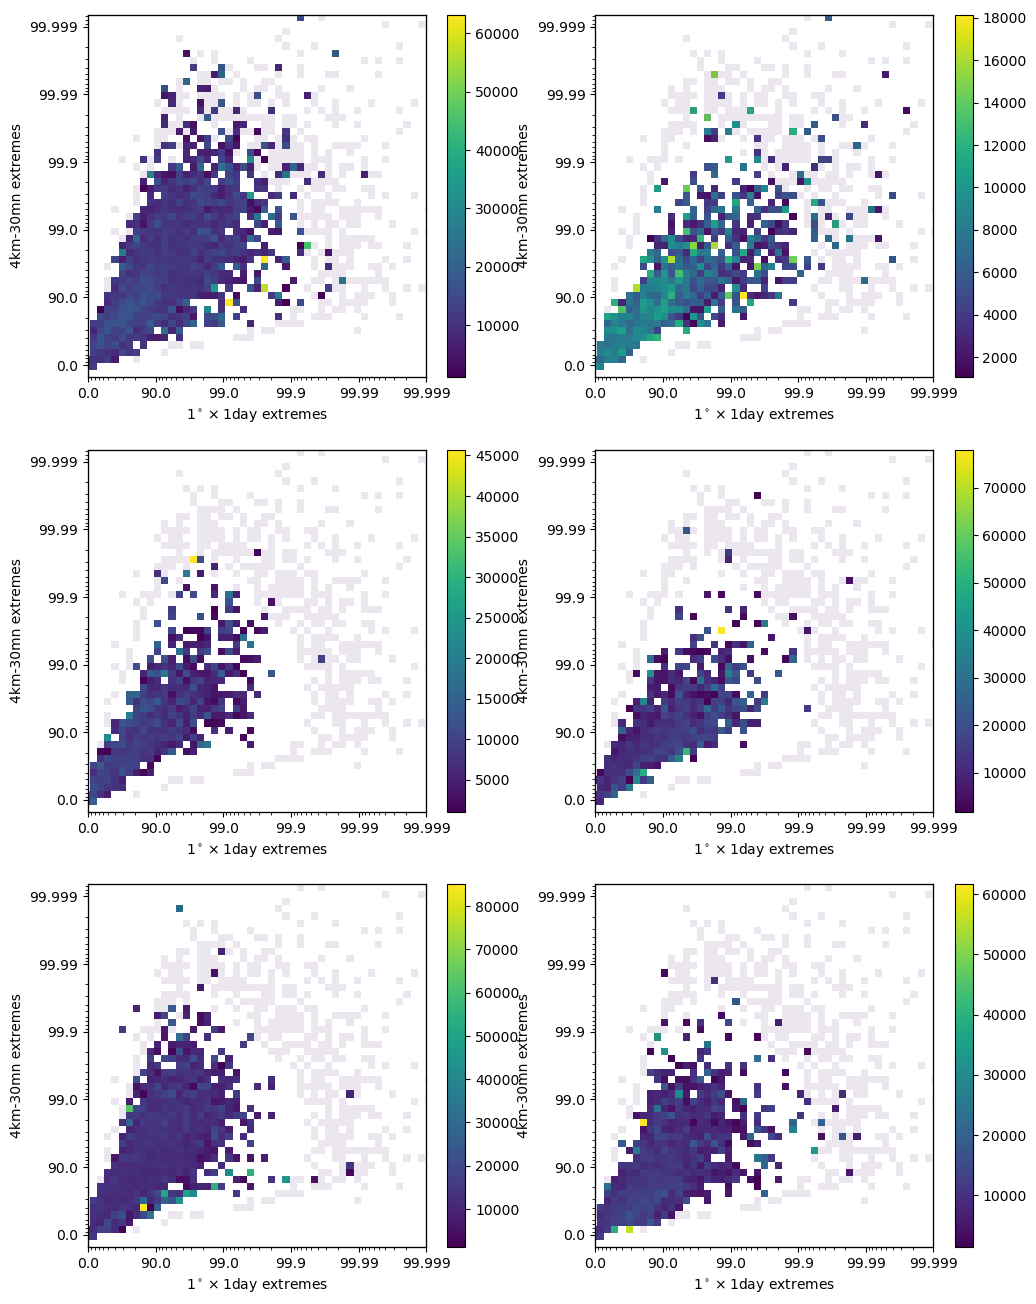

In [19]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize = (12, 16))

for data, ax in zip(surfaces, axs.flatten()):
    jd.plot_data(data, noise, cmap = plt.cm.viridis, fig = fig, ax = ax)

In [21]:
durations = [jd.storm_attributes_on_jdist('duration', 'mean', region_labels_in_jdist = labels) for labels in jd.regions_labels_in_jdist]


123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495012345678910111213141516171819202122232425262728293031323334353637383940414243444546474849501234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495012345678910111213141516171819202122232425262728293031323334353637383940414243444546474849501234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950

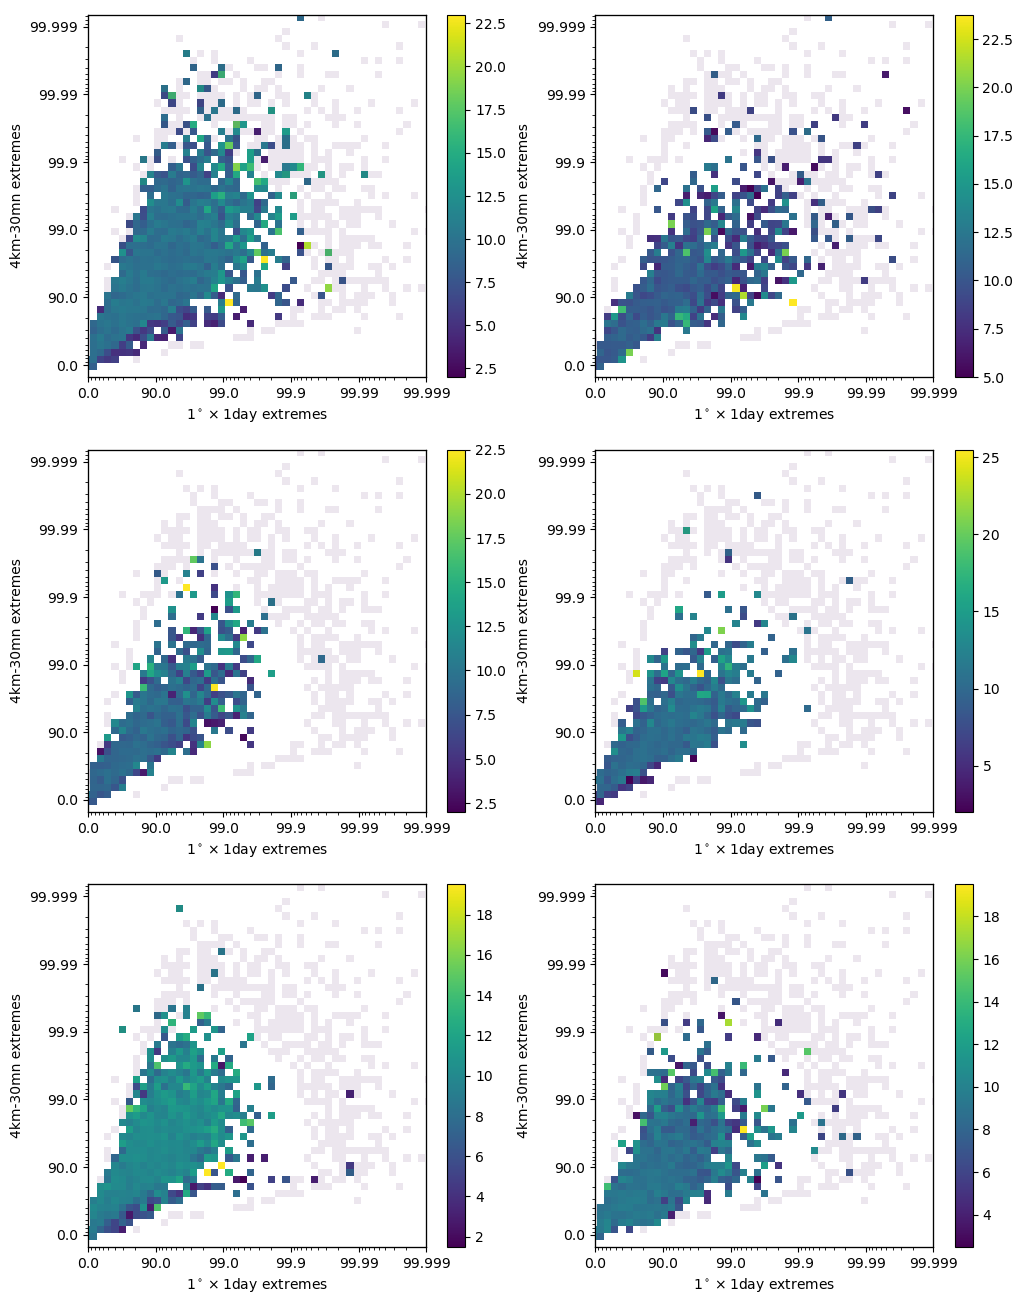

In [22]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize = (12, 16))

for data, ax in zip(durations, axs.flatten()):
    jd.plot_data(data, noise, cmap = plt.cm.viridis, fig = fig, ax = ax)

In [ ]:
distances = [jd.storm_attributes_on_jdist('dist', 'mean', region_labels_in_jdist = labels) for labels in jd.regions_labels_in_jdist]

123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495012345678910111213141516171819202122232425262728293031323334353637383940414243444546474849501234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495012345678910111213141516171819202122232425262728293031323334353637383940414243444546474849501234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950

In [24]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize = (12, 16))

for data, ax in zip(distances, axs.flatten()):
    jd.plot_data(data, noise, cmap = plt.cm.viridis, fig = fig, ax = ax)

01234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950

Text(0.5, 1.0, 'Mean growth rate')

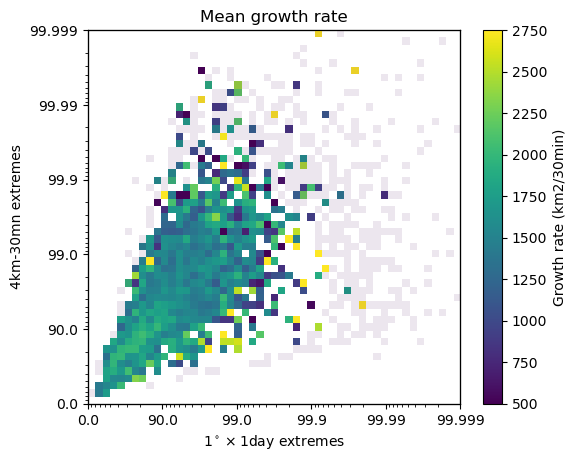

In [25]:
mean_growth_rate = jd.storm_attributes_on_jdist(['growth_rate'], ['mean'], region = "wpwp")[0][0,0,:,:]
jd.plot_data(mean_growth_rate, noise, cmap = plt.cm.viridis, branch=False, label = 'Growth rate (km2/30min)', vbds = (500, 2750))
plt.title("Mean growth rate")

## East Pacific ITCZ

01234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950

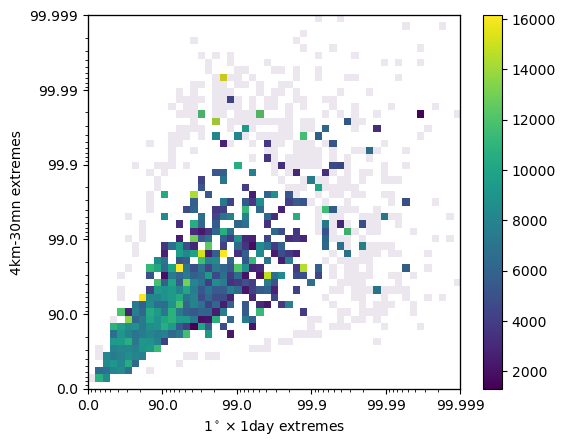

In [13]:
A_mean = jd.storm_attributes_on_jdist(['surfmaxkm2_172Wm2'], ['mean'], region = "ep_itcz")
A_mean = A_mean[0][0,0]
jd.plot_data(A_mean, noise, cmap = plt.cm.viridis, branch=False)

01234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950

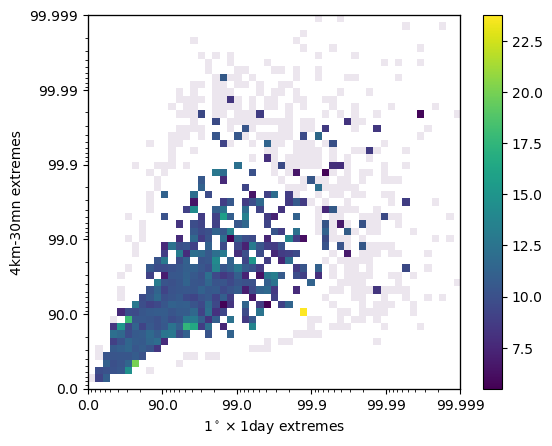

In [14]:
duration_mean = jd.storm_attributes_on_jdist(['duration'], ['mean'], region = "ep_itcz")
duration_mean = duration_mean[0][0,0,:,:]
jd.plot_data(duration_mean, noise, cmap = plt.cm.viridis, branch=False)

01234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950

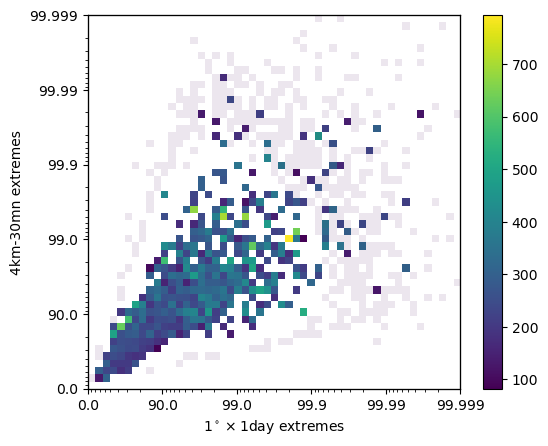

In [15]:
dist_mean = jd.storm_attributes_on_jdist(['dist'], ['mean'], region = "ep_itcz")
dist_mean = dist_mean[0][0,0]
jd.plot_data(dist_mean, noise, cmap = plt.cm.viridis, branch=False)

01234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950

Text(0.5, 1.0, 'Mean growth rate')

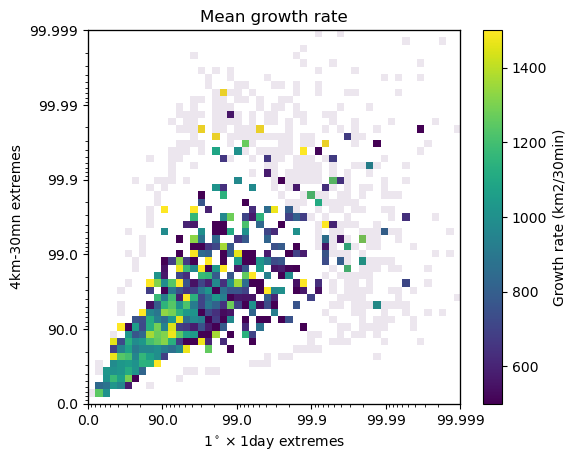

In [28]:
mean_growth_rate = jd.storm_attributes_on_jdist(['growth_rate'], ['mean'], region = "ep_itcz")[0][0,0,:,:]
jd.plot_data(mean_growth_rate, noise, cmap = plt.cm.viridis, branch=False, label = 'Growth rate (km2/30min)', vbds = (500, 1500))
plt.title("Mean growth rate")

## ATlantic ITCZ

01234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950

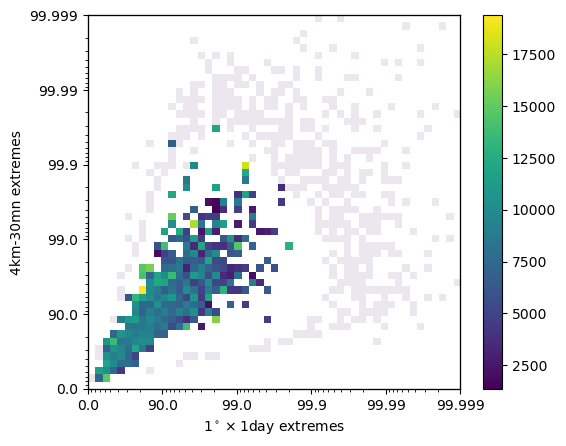

In [18]:
A_mean = jd.storm_attributes_on_jdist(['surfmaxkm2_172Wm2'], ['mean'], region = "atl_itcz")
A_mean = A_mean[0][0,0]
jd.plot_data(A_mean, noise, cmap = plt.cm.viridis, branch=False)

01234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950

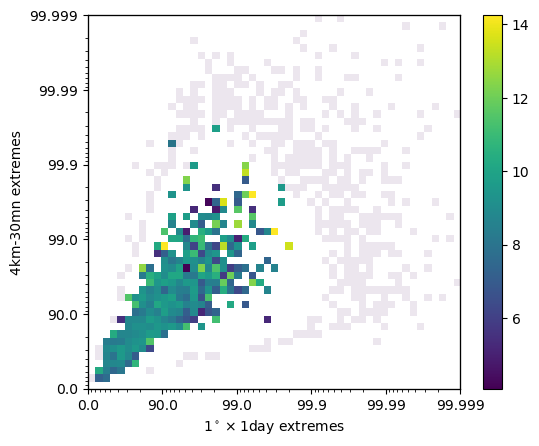

In [19]:
duration_mean = jd.storm_attributes_on_jdist(['duration'], ['mean'], region = "atl_itcz")
duration_mean = duration_mean[0][0,0,:,:]
jd.plot_data(duration_mean, noise, cmap = plt.cm.viridis, branch=False)

01234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950

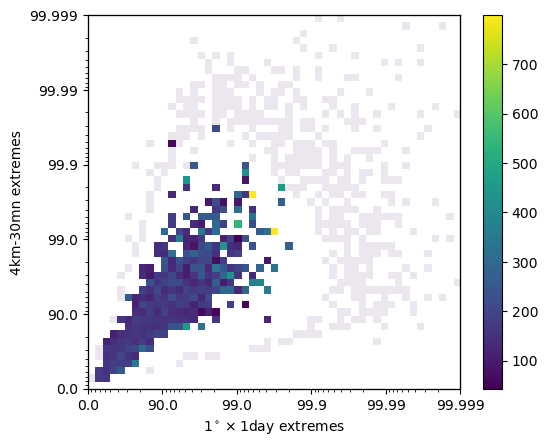

In [20]:
dist_mean = jd.storm_attributes_on_jdist(['dist'], ['mean'], region = "atl_itcz")
dist_mean = dist_mean[0][0,0]
jd.plot_data(dist_mean, noise, cmap = plt.cm.viridis, branch=False)

Text(0.5, 1.0, 'Mean growth rate')

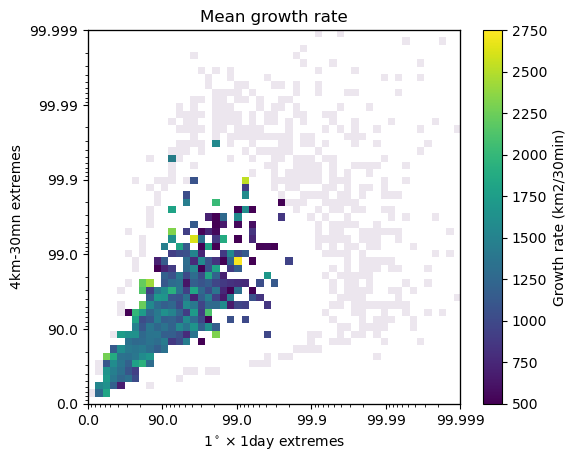

In [24]:
# mean_growth_rate = jd.storm_attributes_on_jdist(['growth_rate'], ['mean'], region = "atl_itcz")[0][0,0,:,:]
jd.plot_data(mean_growth_rate, noise, cmap = plt.cm.viridis, branch=False, label = 'Growth rate (km2/30min)', vbds = (500, 2750))
plt.title("Mean growth rate")

# Dev

In [88]:
#add 180 to longitudes because mask index goes from 0 to 360, not -180 to 180 !!!
lon_min, lon_max = 210, 365 #gr.lon_slice.start , gr.lon_slice.stop
lon_slice = slice(lon_min, lon_max)
#add 30 to latitudes because mask index goes from 0 to 60, not -30 to 30 !!!
lat_min, lat_max = 30, 50 #gr.lat_slice.start + 30 !!, gr.lat_slice.stop
lat_slice = slice(lat_min, lat_max)

In [89]:
def get_mask_yxt(self, d1, d2, regional = False, lat_slice = None, lon_slice = None):
    dj = self.joint_digit(d1, d2)
    dj_3d = self.joint_digit(self.digit_3d_1, self.digit_3d_2)
    mask = dj_3d == dj
    if regional : 
        region_mask = np.zeros_like(mask, dtype = bool)
        if lat_slice is not None and lon_slice is not None:
            region_mask[lat_slice, lon_slice] = mask[lat_slice, lon_slice] 
        mask = region_mask
    return mask

In [90]:
wpwp_ij_mask = get_mask_yxt(jd, 1, 1, True, lat_slice, lon_slice)
# wpwp_ij_mask = get_mask_yxt(jd, 1, 1)
np.all(wpwp_ij_mask[:,:,:]==False)

False